C:\Users\ankur\AppData\Local\Temp\ipykernel_12640\2865843573.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download(stocks, start=start, end=end)["Close"]
[*********************100%***********************]  10 of 10 completed
C:\Users\ankur\AppData\Local\Temp\ipykernel_12640\2865843573.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change()


Stocks in Portfolio:
Index(['ASHOKLEY.NS', 'BAJAJ-AUTO.NS', 'BHARATFORG.NS', 'EICHERMOT.NS',
       'HEROMOTOCO.NS', 'M&M.NS', 'MARUTI.NS', 'MOTHERSON.NS', 'TATAMOTORS.NS',
       'TVSMOTOR.NS', 'Portfolio'],
      dtype='object', name='Ticker')

Random Portfolio Weights:
M&M.NS: 0.0461
MARUTI.NS: 0.0959
BAJAJ-AUTO.NS: 0.0923
EICHERMOT.NS: 0.1039
TVSMOTOR.NS: 0.1782
HEROMOTOCO.NS: 0.0025
TATAMOTORS.NS: 0.1706
MOTHERSON.NS: 0.1070
ASHOKLEY.NS: 0.1071
BHARATFORG.NS: 0.0964

Mean Returns:
Ticker
ASHOKLEY.NS      0.001550
BAJAJ-AUTO.NS    0.001230
BHARATFORG.NS    0.000676
EICHERMOT.NS     0.001490
HEROMOTOCO.NS    0.001473
M&M.NS           0.001758
MARUTI.NS        0.000962
MOTHERSON.NS     0.001409
TATAMOTORS.NS   -0.000706
TVSMOTOR.NS      0.001727
dtype: float64

Covariance Matrix:
Ticker         ASHOKLEY.NS  BAJAJ-AUTO.NS  BHARATFORG.NS  EICHERMOT.NS  \
Ticker                                                                   
ASHOKLEY.NS       0.000358       0.000101       0.000176   

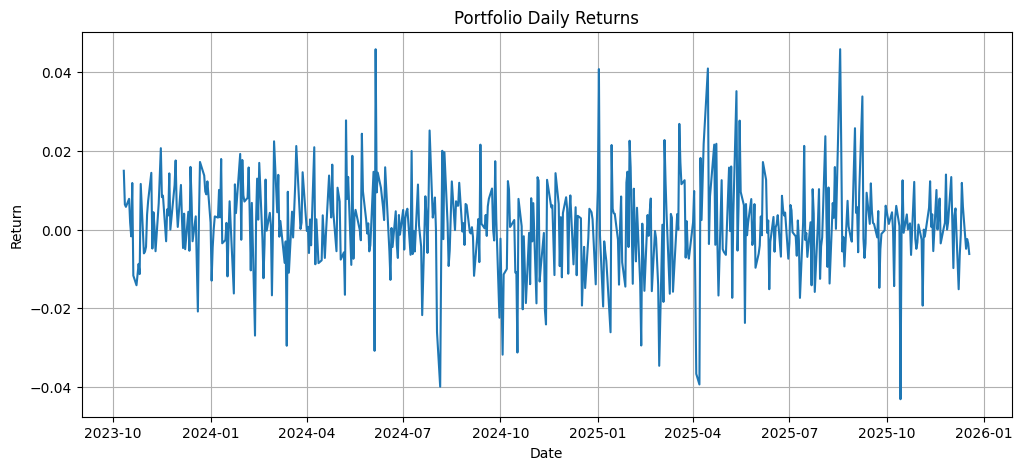

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

# --------- FUNCTION TO IMPORT DATA ----------
def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)["Close"]
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

# --------- PORTFOLIO PERFORMANCE FUNCTION ----------
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    portfolio_return = np.sum(meanReturns * weights) * Time
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(Time)
    return portfolio_return, portfolio_std


# --------- OUR CHOSEN AUTOMOBILE STOCKS ----------
stocks = [
    "M&M.NS",
    "MARUTI.NS",
    "BAJAJ-AUTO.NS",
    "EICHERMOT.NS",
    "TVSMOTOR.NS",
    "HEROMOTOCO.NS",
    "TATAMOTORS.NS",
    "MOTHERSON.NS",
    "ASHOKLEY.NS",
    "BHARATFORG.NS"
]

# --------- DATE RANGE ----------
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

# --------- GET RETURNS, MEAN RETURNS, COVARIANCE ----------
returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

# --------- RANDOM WEIGHTS FOR PORTFOLIO ----------
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)   # normalize to 1

# --------- CREATE PORTFOLIO RETURN SERIES ----------
returns['Portfolio'] = returns.dot(weights)

# --------- PRINT OUTPUT ----------
print("Stocks in Portfolio:")
print(returns.columns)

print("\nRandom Portfolio Weights:")
for stock, w in zip(stocks, weights):
    print(f"{stock}: {w:.4f}")

print("\nMean Returns:")
print(meanReturns)

print("\nCovariance Matrix:")
print(covMatrix)

# --------- PLOT PORTFOLIO RETURNS ----------
plt.figure(figsize=(12,5))
plt.plot(returns['Portfolio'])
plt.title("Portfolio Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()


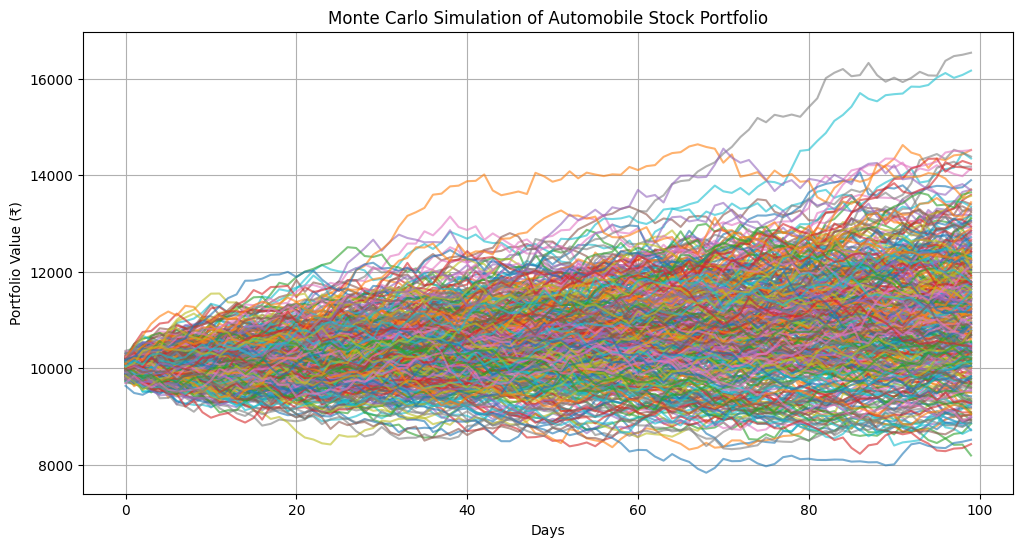

In [3]:
# --------- MONTE CARLO SIMULATION ----------
mc_sims = 400   # number of simulations
T = 100         # time horizon (days)

# Create mean return matrix for broadcasting
mean_matrix = np.repeat(meanReturns.values.reshape(1, -1), T, axis=0)

# Initialize simulation matrix
portfolio_sims = np.zeros((T, mc_sims))

initialPortfolio = 10000

# Cholesky decomposition for correlation
L = np.linalg.cholesky(covMatrix)

for m in range(mc_sims):
    # Random normal numbers for shocks
    Z = np.random.normal(size=(T, len(weights)))
    
    # Generate correlated daily returns
    correlated_daily_returns = mean_matrix + Z.dot(L.T)
    
    # Convert to portfolio returns
    portfolio_returns = correlated_daily_returns.dot(weights)
    
    # Portfolio value path
    portfolio_values = initialPortfolio * np.cumprod(1 + portfolio_returns)
    
    portfolio_sims[:, m] = portfolio_values

# --------- PLOT RESULTS ----------
plt.figure(figsize=(12,6))
plt.plot(portfolio_sims, alpha=0.6)
plt.ylabel('Portfolio Value (₹)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of Automobile Stock Portfolio')
plt.grid(True)
plt.show()


Monte Carlo Simulation Summary (400 runs)
------------------------------------------
Minimum Return: -18.07%
Median Return:  12.25%
Maximum Return: 65.38%
Average Return: 11.96%

Value at Risk (VaR) and Expected Shortfall (CVaR)
---------------------------------------------------
95% VaR: -9.34%
99% VaR: -12.69%
95% CVaR (Expected Shortfall): -11.56%
99% CVaR (Expected Shortfall): -15.35%


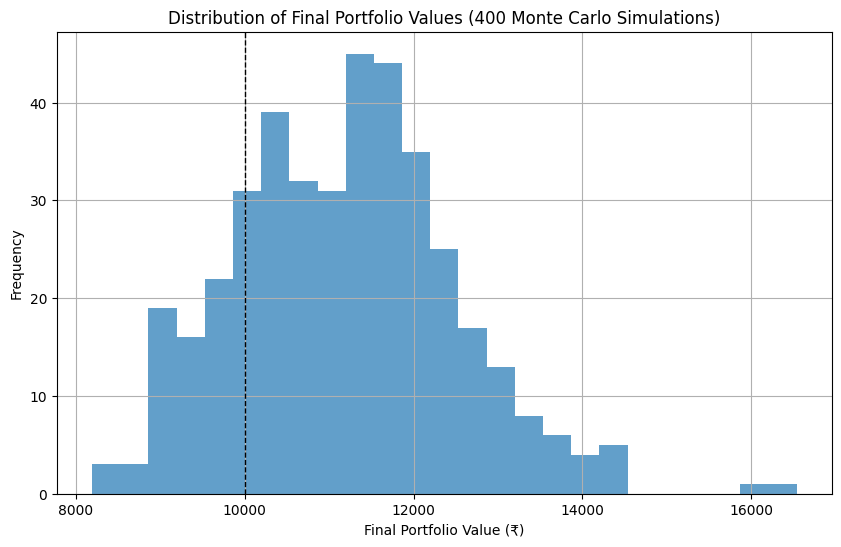


Portfolio Final Value Range (₹):
--------------------------------
Minimum value: ₹8,193.46
Median value:  ₹11,224.91
Maximum value: ₹16,537.67
Average value: ₹11,195.52


In [4]:
# ---------------------------------------------------------
# ADVANCED ANALYTICS FOR MONTE CARLO SIMULATION
# ---------------------------------------------------------

# Extract final portfolio values from all 400 simulations
final_portfolio_values = portfolio_sims[-1, :]

# Convert to returns relative to initial investment
mc_returns = (final_portfolio_values - initialPortfolio) / initialPortfolio

# ----- SUMMARY STATISTICS -----
min_ret = np.min(mc_returns)
median_ret = np.median(mc_returns)
max_ret = np.max(mc_returns)
avg_ret = np.mean(mc_returns)

print("Monte Carlo Simulation Summary (400 runs)")
print("------------------------------------------")
print(f"Minimum Return: {min_ret*100:.2f}%")
print(f"Median Return:  {median_ret*100:.2f}%")
print(f"Maximum Return: {max_ret*100:.2f}%")
print(f"Average Return: {avg_ret*100:.2f}%")

# ----- VALUE AT RISK (VaR) -----
var_95 = np.percentile(mc_returns, 5)
var_99 = np.percentile(mc_returns, 1)

# ----- CVaR -----
cvar_95 = mc_returns[mc_returns <= var_95].mean()
cvar_99 = mc_returns[mc_returns <= var_99].mean()

print("\nValue at Risk (VaR) and Expected Shortfall (CVaR)")
print("---------------------------------------------------")
print(f"95% VaR: {var_95*100:.2f}%")
print(f"99% VaR: {var_99*100:.2f}%")
print(f"95% CVaR (Expected Shortfall): {cvar_95*100:.2f}%")
print(f"99% CVaR (Expected Shortfall): {cvar_99*100:.2f}%")

# ----- HISTOGRAM OF SIMULATED FINAL VALUES -----
plt.figure(figsize=(10,6))
plt.hist(final_portfolio_values, bins=25, alpha=0.7)
plt.axvline(initialPortfolio, color='black', linestyle='dashed', linewidth=1)
plt.title("Distribution of Final Portfolio Values (400 Monte Carlo Simulations)")
plt.xlabel("Final Portfolio Value (₹)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ----- PRINT RANGE -----
print("\nPortfolio Final Value Range (₹):")
print("--------------------------------")
print(f"Minimum value: ₹{final_portfolio_values.min():,.2f}")
print(f"Median value:  ₹{np.median(final_portfolio_values):,.2f}")
print(f"Maximum value: ₹{final_portfolio_values.max():,.2f}")
print(f"Average value: ₹{final_portfolio_values.mean():,.2f}")



 MAX SHARPE RATIO PORTFOLIO 
M&M.NS: 0.1784
MARUTI.NS: 0.1388
BAJAJ-AUTO.NS: 0.0103
EICHERMOT.NS: 0.0611
TVSMOTOR.NS: 0.1908
HEROMOTOCO.NS: 0.1639
TATAMOTORS.NS: 0.0296
MOTHERSON.NS: 0.0202
ASHOKLEY.NS: 0.0006
BHARATFORG.NS: 0.2064

 MINIMUM VARIANCE PORTFOLIO 
M&M.NS: 0.0451
MARUTI.NS: 0.1784
BAJAJ-AUTO.NS: 0.0565
EICHERMOT.NS: 0.1734
TVSMOTOR.NS: 0.1299
HEROMOTOCO.NS: 0.0586
TATAMOTORS.NS: 0.1988
MOTHERSON.NS: 0.0077
ASHOKLEY.NS: 0.0554
BHARATFORG.NS: 0.0962


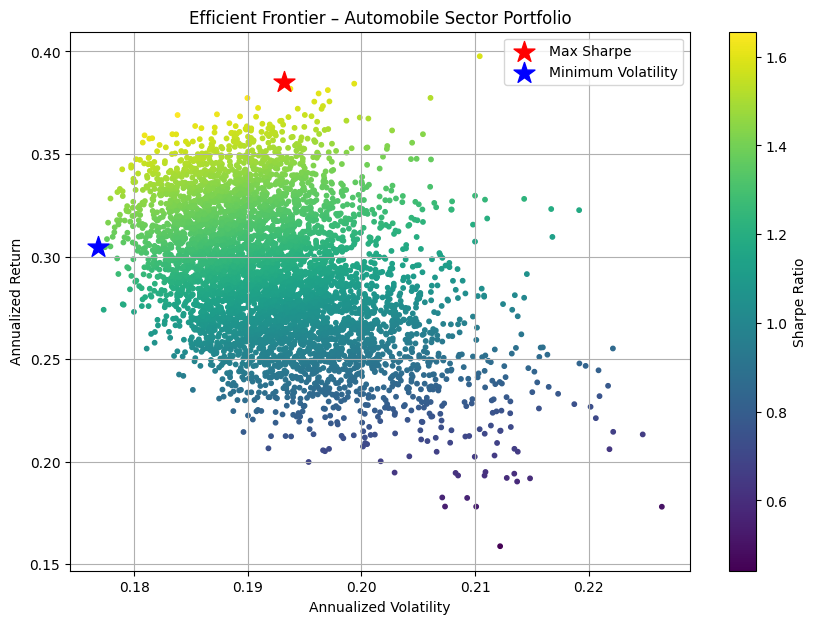

In [5]:
# ---------------------------------------------------------
# EFFICIENT FRONTIER + MAX SHARPE & MIN VARIANCE PORTFOLIOS
# ---------------------------------------------------------

num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

risk_free_rate = 0.065   # 6% RF rate typical for India

for i in range(num_portfolios):
    # Generate random weights
    w = np.random.random(len(stocks))
    w = w / np.sum(w)   # normalization
    
    weights_record.append(w)
    
    # Annualized return
    port_return = np.sum(meanReturns * w) * 252
    
    # Annualized volatility
    port_vol = np.sqrt(np.dot(w.T, np.dot(covMatrix, w))) * np.sqrt(252)
    
    # Sharpe Ratio
    sharpe = (port_return - risk_free_rate) / port_vol
    
    # Store results
    results[0, i] = port_vol
    results[1, i] = port_return
    results[2, i] = sharpe

# Extract optimal portfolios
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[0])

max_sharpe_weights = weights_record[max_sharpe_idx]
min_vol_weights = weights_record[min_vol_idx]

# ----- PRINT RESULTS -----
print("\n==============================")
print(" MAX SHARPE RATIO PORTFOLIO ")
print("==============================")
for stock, w in zip(stocks, max_sharpe_weights):
    print(f"{stock}: {w:.4f}")

print("\n==============================")
print(" MINIMUM VARIANCE PORTFOLIO ")
print("==============================")
for stock, w in zip(stocks, min_vol_weights):
    print(f"{stock}: {w:.4f}")

# ----- PLOT THE EFFICIENT FRONTIER -----
plt.figure(figsize=(10,7))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', s=10)
plt.colorbar(label='Sharpe Ratio')

# Highlight optimal portfolios
plt.scatter(results[0, max_sharpe_idx], results[1, max_sharpe_idx],
            color='red', marker='*', s=250, label='Max Sharpe')

plt.scatter(results[0, min_vol_idx], results[1, min_vol_idx],
            color='blue', marker='*', s=250, label='Minimum Volatility')

plt.title("Efficient Frontier – Automobile Sector Portfolio")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.legend()
plt.grid(True)
plt.show()
